In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
mnist_data = pd.read_csv("E:/applied AI/File/MNIST.csv")
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
l = mnist_data['label']
data = mnist_data.drop("label",axis=1)

In [4]:
# Data Preprocessing and Standardization 
Standardized_data = StandardScaler().fit_transform(data)
print(Standardized_data.shape)

(42000, 784)


In [10]:


data_2000 = Standardized_data[0:42000,:]
label_2000 = l[0:42000]


model = TSNE(n_components =2, random_state=0)
tsne_data = model.fit_transform(data_2000)

tsne_data = np.vstack((tsne_data.T, label_2000)).T
print(tsne_data)
tsne_df = pd.DataFrame(data=tsne_data, columns = ("Dim_1","Dim_2","label"))


[[-42.78499985 -34.26610947   1.        ]
 [ 11.89276886  49.37719727   0.        ]
 [-61.2973671    1.48762143   1.        ]
 ...
 [ 53.78929901 -13.31842613   7.        ]
 [-35.65174866  51.81077957   6.        ]
 [ 19.60346031 -40.72573471   9.        ]]


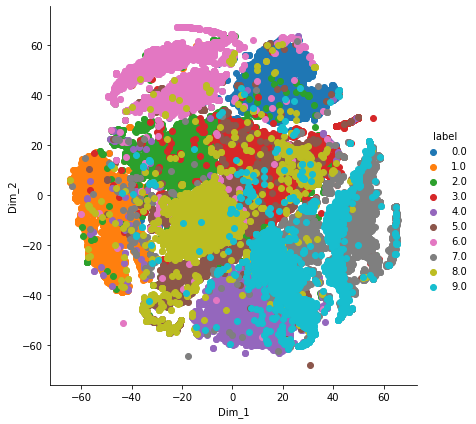

In [11]:
# plotting the model 
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()